In [53]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


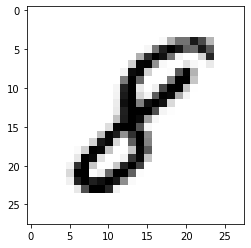

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [56]:
x_train.shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [58]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2122 - accuracy: 0.9360
Epoch 2/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0859 - accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0583 - accuracy: 0.9815
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0456 - accuracy: 0.98531s - loss: 0.0 - ETA: 1s - loss: 0.0452 - accu
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0353 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0297 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0246 - accuracy: 0.99180s - loss: 0
Epoch 8/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0216 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0208 - accuracy: 0.99290s - lo

In [59]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0572 - accuracy: 0.9880


[0.05721209570765495, 0.9879999756813049]

6


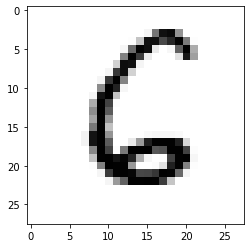

In [64]:
image_index = 98
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [65]:
print(pred.argmax())

6
